<a href="https://colab.research.google.com/github/zjuiEMLab/rshub/blob/main/demo/Vegetation-Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uniform vs. Layered Vegetation Brightness Temperature

In [1]:
import datetime
import copy
!pip install rshub

## Validate the brightness temperature with uniform and layered Vegetation structures

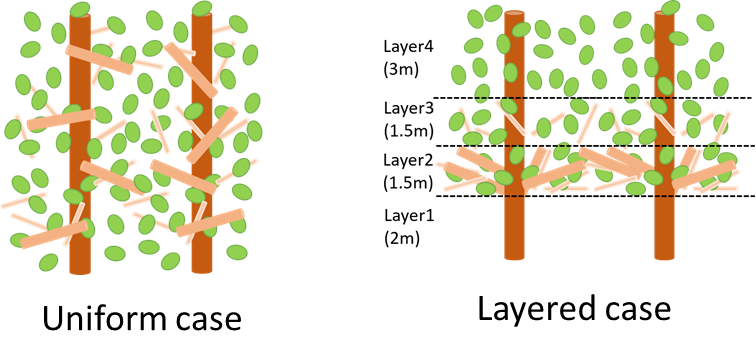

In [2]:
# Define user token
token = 'ENTER YOUR TOKEN HERE' # Register an account to get a token
# Chang your task name or project name every time you run a new job
project_name = 'Vegetation Validation'
task_name1 = 'Layered Vegetation'
task_name2 = 'Uniform Vegetation'

### Step 1: Define Scenario flag

In [3]:
# ============== CHANGE YOUR INPUT PARAMETERS HERE ==============
# ====== Parameters not define will be set to default values ======

# 1: Bare soil
# 2: Snow
# 3: Vegetation covered soil
scenario_flag = 3

### Step 2: Define observation description

In [4]:
# 1) Observation mode
# 1: Active (Backscatter)
# 2: Passive (Brightness temperature)
output_var = 2

# 2) Observation characteristics
fGHz = 1.41

### Step 3: Define Algorithm flag

In [5]:
# 1: RT
algorithm = 1

### Step 4: Describe your scenario

In [6]:
scatters1=[[]]
# Branch
types = 1 # 1: cylinder; 0: disc
VM = 0.37 # Volumetric Moisture 
L = 7.85 # Length of the scatterer [m]
D = 0.15 # Diameter of the scatterer [m]
beta1 = 0 # lower bound of orientation range of the scatterer (degree)
beta2 = 10 # upper bound of orientation range of the scatterer (degree)
disbot = 0 # lower bound of vertical distribution range of the scatterer
distop = 8 # upper bound of vertical distribution range of the scatterer
NA = 0.24 # density of the scatterer
scatters1[0]=[types, VM, L, D, beta1, beta2, disbot, distop, NA]

# Primary branch
types = 1 # 1: cylinder; 0: disc
VM = 0.501 # Volumetric Moisture 
L = 1.41 # Length of the scatterer [m]
D = 0.0288 # Diameter of the scatterer [m]
beta1 = 30 # lower bound of orientation range of the scatterer (degree)
beta2 = 90 # upper bound of orientation range of the scatterer (degree)
disbot = 2 # lower bound of vertical distribution range of the scatterer
distop = 3.5 # upper bound of vertical distribution range of the scatterer
NA = 3.12 # density of the scatterer
scatters1.append([types, VM, L, D, beta1, beta2, disbot, distop, NA])

# Secondary branch
types = 1 # 1: cylinder; 0: disc
VM = 0.444 # Volumetric Moisture 
L = 0.555 # Length of the scatterer [m]
D = 0.0112 # Diameter of the scatterer [m]
beta1 = 35 # lower bound of orientation range of the scatterer (degree)
beta2 = 90 # upper bound of orientation range of the scatterer (degree)
disbot = 2 # lower bound of vertical distribution range of the scatterer
distop = 5 # upper bound of vertical distribution range of the scatterer
NA = 34.32 # density of the scatterer
scatters1.append([types, VM, L, D, beta1, beta2, disbot, distop, NA])

# Leaf
types = 0 # 1: cylinder; 0: disc
VM = 0.58 # Volumetric Moisture 
L = 0.0001 # thickness of the scatterer [m]
D = 0.04 # Diameter of the scatterer [m]
beta1 = 0 # lower bound of orientation range of the scatterer (degree)
beta2 = 90 # upper bound of orientation range of the scatterer (degree)
disbot = 2 # lower bound of vertical distribution range of the scatterer
distop = 8 # upper bound of vertical distribution range of the scatterer
NA = 7712.64 # density of the scatterer
scatters1.append([types, VM, L, D, beta1, beta2, disbot, distop, NA])
print(scatters1)

[[1, 0.37, 7.85, 0.15, 0, 10, 0, 8, 0.24], [1, 0.501, 1.41, 0.0288, 30, 90, 2, 3.5, 3.12], [1, 0.444, 0.555, 0.0112, 35, 90, 2, 5, 34.32], [0, 0.58, 0.0001, 0.04, 0, 90, 2, 8, 7712.64]]


In [7]:
scatters2=copy.deepcopy(scatters1)
# Primary Branch distributed at 2 - 3.5 meters
scatters2[1][6] = 0
scatters2[1][7] = 8

# Secondary Branch distributed at 3.5 - 5 meters
scatters2[2][6] = 0
scatters2[2][7] = 8

# Leaves distributed at 5 - 8 meters
scatters2[3][6] = 0
scatters2[3][7] = 8
print(scatters2)

[[1, 0.37, 7.85, 0.15, 0, 10, 0, 8, 0.24], [1, 0.501, 1.41, 0.0288, 30, 90, 0, 8, 3.12], [1, 0.444, 0.555, 0.0112, 35, 90, 0, 8, 34.32], [0, 0.58, 0.0001, 0.04, 0, 90, 0, 8, 7712.64]]


### Step 5: Define Soil properties
#### The following soil moisture parameter (sm), ground temperature (Tgnd) and vegetation parameter (Tveg) is selected from Chen and Tan, 2024

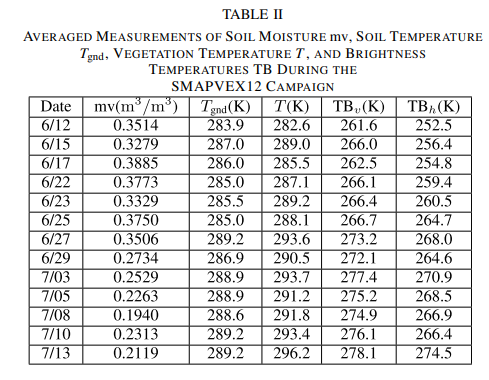

In [8]:
sm = [0.3514, 0.3279, 0.3885, 0.3773, 0.3329, 0.3750, 0.3506, 0.2734, 0.2529, 0.2263, 0.1940, 0.2313, 0.2119] # soil moisture
Tgnd = [283.9, 287.0, 286.0, 285.0, 285.5, 285.0, 289.2, 286.9, 288.9, 288.9, 288.6, 289.2, 289.2] # Ground Temperature
Tveg = [282.6, 289.0, 285.5, 287.1, 289.2, 288.1, 293.6, 290.5, 293.7, 291.2, 291.8, 293.4, 296.2] # Vegetation Temperature

## Run models

In [ ]:
from rshub import submit_jobs
import time

for idate in range(len(sm)):
    data1 = {
        'scenario_flag': scenario_flag,
        'output_var': output_var,'fGHz': fGHz,
        'algorithm':algorithm,
        'scatters': scatters1,'core_num':2,
        'sm': sm[idate],'Tgnd':Tgnd[idate],'Tveg':Tveg[idate],
        'project_name':project_name,
        'task_name':task_name1+' Date'+str(idate),
        'token': token,
        'level_required':1
    }

    data2 = {
        'scenario_flag': scenario_flag,
        'output_var': output_var,'fGHz': fGHz,
        'sm': sm[idate],'Tgnd':Tgnd[idate],'Tveg':Tveg[idate],
        'algorithm':algorithm,
        'scatters': scatters2,'core_num':2,
        'project_name':project_name,
        'task_name':task_name2 +' Date'+str(idate),
        'token': token,
        'level_required':1
    }

    result1=submit_jobs.run(data1)
    time.sleep(3) # wait for a few seconds if you want to submit multiple jobs
    result2=submit_jobs.run(data2)
    time.sleep(3) # wait for a few seconds if you want to submit multiple jobs
    print(result1['result'])
    print(result2['result'])

# Check Job Status (Jobs may take a long time to run!)

### Please check error messages. Rerun failed job if there are resources error

In [12]:
from rshub import submit_jobs
for idate in range(len(sm)):
    taskname=task_name1 +' Date'+str(idate)
    result=submit_jobs.check_completion(token, project_name, taskname)
    #result=submit_jobs.check_completion(token, project_name, task_name2 +' Date11')
    print(f"{project_name}, {taskname}: {result}")
    taskname=task_name2 +' Date'+str(idate)
    result=submit_jobs.check_completion(token, project_name, taskname)
    #result=submit_jobs.check_completion(token, project_name, task_name2 +' Date11')
    print(f"{project_name}, {taskname}: {result}")
    

Vegetation Validation, Layered Vegetation Date0: Jobs are completed
Vegetation Validation, Uniform Vegetation Date0: Jobs are completed
Vegetation Validation, Layered Vegetation Date1: Jobs are completed
Vegetation Validation, Uniform Vegetation Date1: Jobs are completed
Vegetation Validation, Layered Vegetation Date2: Jobs are completed
Vegetation Validation, Uniform Vegetation Date2: Jobs are completed
Vegetation Validation, Layered Vegetation Date3: Jobs are completed
Vegetation Validation, Uniform Vegetation Date3: Jobs are completed
Vegetation Validation, Layered Vegetation Date4: Jobs are completed
Vegetation Validation, Uniform Vegetation Date4: Jobs are completed
Vegetation Validation, Layered Vegetation Date5: Jobs are completed
Vegetation Validation, Uniform Vegetation Date5: Jobs are completed
Vegetation Validation, Layered Vegetation Date6: Jobs are completed
Vegetation Validation, Uniform Vegetation Date6: Jobs are completed
Vegetation Validation, Layered Vegetation Date7:

# Check if there are any error messages

In [13]:
from rshub.load_file import load_file

data = load_file(token, project_name, task_name2 +' Date'+str(idate), fGHz)
message = data.load_error_message()

message: Jobs completed succesfully



# Post Process

In [14]:
from rshub.load_file import load_file
from scipy import interpolate 

In [15]:
# Validate data at 40 degree
theta = 40
Tb40_v_layered=[]
Tb40_h_layered=[]
Tb40_v_uniform=[]
Tb40_h_uniform=[]

for idate in range(len(sm)):
    
    # Read variables into python
    # 1) Layered Case
    data1 = load_file(token, project_name, task_name1 +' Date'+str(idate),fGHz,scenario_flag,output_var)
    data_multi = data1.load_outputs()
    
    TU_all = data_multi['TU_all'] # Tbs
    theta_obs = data_multi['theta_obs'] # theta
      
    Tb_v = interpolate.interp1d(theta_obs[0], TU_all[0]) 
    Tb40_v_layered.append(Tb_v(theta))

    Tb_h = interpolate.interp1d(theta_obs[0], TU_all[1]) 
    Tb40_h_layered.append(Tb_h(theta))
    
    # 2) Uniform Case
    data2 = load_file(token, project_name, task_name2 +' Date'+str(idate),fGHz,scenario_flag,output_var)
    data_multi2 = data2.load_veg_TB()

    TU_all2 = data_multi2['TU_all'] # Tbs
    theta_obs2 = data_multi2['theta_obs'] # theta
    
    Tb_v2 = interpolate.interp1d(theta_obs2[0], TU_all2[0]) 
    Tb40_v_uniform.append(Tb_v2(theta))

    Tb_h2 = interpolate.interp1d(theta_obs2[0], TU_all2[1]) 
    Tb40_h_uniform.append(Tb_h2(theta))

In [16]:
import numpy
# F5 data
Tbv = [261.6, 266.0, 262.5, 266.1, 266.4, 266.7, 273.2, 272.1, 277.4, 275.2, 274.9, 276.1, 278.1]
Tbh = [252.5, 256.4, 254.8, 259.4, 260.5, 264.7, 268.0, 264.6, 270.9, 268.5, 266.9, 266.4, 274.5]

Tbv_min = [256.4, 262.6, 258.2, 261.67, 263.7, 262.6, 270.6, 268.6, 274.5, 269.7, 270.89, 271.9, 272.8]
Tbh_min = [248.4, 251.2, 248.7, 256.5, 256.9, 261.3, 264.7, 261.1, 265.0, 263.1, 261.6, 260.5, 271.6]

Tbv_max = [264.8, 269.9, 266.5, 271.5, 268.7, 269.6, 276.6, 276.0, 281.1, 277.8, 277.5, 281.1, 281.0]
Tbh_max = [257.2, 263.6, 258.3, 262.0, 266.7, 268.0, 273.6, 269.2, 275.2, 272.3, 272.3, 267.0, 280.2]

# F3 data
#Tbv = [261.3, 268.8, 263.4, 266.2, 266.0, 267.0, 274.6, 270.3, 274.9, 273.6, 274.8, 275.4, 279.3]
#Tbh = [254.3, 260.1, 258.0, 258.7, 261.3, 263.4, 269.6, 264.0, 268.2, 267.2, 264.8, 269.1, 274.0]

#Tbv_min = [257.3, 263.6, 259.9, 262.4, 262.2, 261.6, 270.1, 264.2, 270.5, 269.7, 270.3, 270.9, 274.5]
#Tbh_min = [249.9, 254.3, 253.2, 253.5, 256.8, 259.5, 265.4, 257.9, 262.9, 260.7, 259.9, 263.9, 266.7]

#Tbv_max = [266.5, 272.7, 267.5, 272.3, 271.2, 272.2, 278.2, 274.8, 279.7, 277.2, 279.5, 280.3, 284.2]
#Tbh_max = [260.1, 265.3, 262.0, 264.3, 266.6, 270.2, 276.4, 269.1, 275.4, 271.1, 270.9, 274.9, 280.0]

sort_index = numpy.argsort(sm)
sm_s = sorted(sm)
Tb_v_truth_s = [Tbv[i] for i in sort_index]
Tb_h_truth_s = [Tbh[i] for i in sort_index]
Tb_v_mintruth_s = [Tbv_min[i] for i in sort_index]
Tb_h_mintruth_s = [Tbh_min[i] for i in sort_index]
Tb_v_maxtruth_s = [Tbv_max[i] for i in sort_index]
Tb_h_maxtruth_s = [Tbh_max[i] for i in sort_index]

Tb40_v_layered_s = [Tb40_v_layered[i] for i in sort_index]
Tb40_h_layered_s = [Tb40_h_layered[i] for i in sort_index]
Tb40_v_uniform_s = [Tb40_v_uniform[i] for i in sort_index]
Tb40_h_uniform_s = [Tb40_h_uniform[i] for i in sort_index]

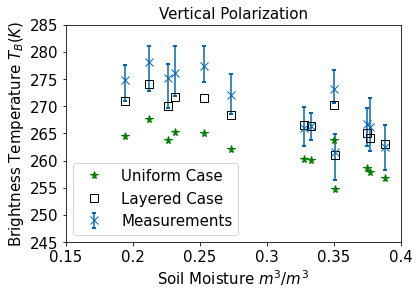

In [17]:
import matplotlib.pyplot as plt
import numpy as np

lower_errors = np.array(Tb_v_truth_s) - np.array(Tb_v_mintruth_s)
upper_errors = np.array(Tb_v_maxtruth_s) - np.array(Tb_v_truth_s)

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.errorbar(sm_s, Tb_v_truth_s, 
                 yerr=[lower_errors, upper_errors],
                 fmt='x',  # Marker style
                 capsize=2,  # Cap width for error bars
                 capthick=2,  # Cap thickness
                 ecolor='#0066b2',  # Error bar color
                 markersize=8,  # Size of markers
                 color='#0066b2')  # Color of markers
ax.plot(sm_s, Tb40_v_uniform_s, color='g', marker='*',linestyle=' ',markersize=8)
ax.plot(sm_s, Tb40_v_layered_s, color='k', marker='s',linestyle=' ',fillstyle='none',markersize=8)
ax.set_ylim(245, 285)
ax.set_xlabel('Soil Moisture $m^3/m^3$', fontsize = 15) 
ax.set_ylabel('Brightness Temperature $T_B(K)$', fontsize = 15) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.xticks([0.15, 0.2, 0.25, 0.3, 0.35, 0.4],['0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])
plt.title('Vertical Polarization', fontsize = 15)
ax.legend(['Uniform Case', 'Layered Case','Measurements'],fontsize = 15,loc='lower left')
plt.savefig('fig4_VP.png', dpi=300)

([<matplotlib.axis.XTick at 0x2b5874a021c0>,
 [Text(0.15, 0, '0.15'),
  Text(0.2, 0, '0.2'),
  Text(0.25, 0, '0.25'),
  Text(0.3, 0, '0.3'),
  Text(0.35, 0, '0.35'),
  Text(0.4, 0, '0.4')])

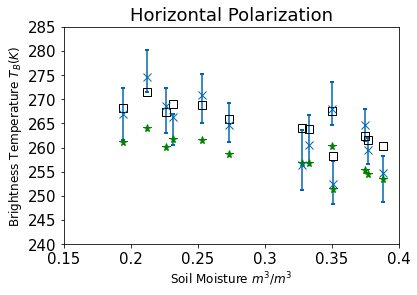

In [18]:
fig = plt.figure()

lower_errors = np.array(Tb_h_truth_s) - np.array(Tb_h_mintruth_s)
upper_errors = np.array(Tb_h_maxtruth_s) - np.array(Tb_h_truth_s)

ax = fig.add_subplot(1, 1, 1)
ax.errorbar(sm_s, Tb_h_truth_s, 
                 yerr=[lower_errors, upper_errors],
                 fmt='x',  # Marker style
                 capsize=2,  # Cap width for error bars
                 capthick=2,  # Cap thickness
                 ecolor='#0066b2',  # Error bar color
                 markersize=8,  # Size of markers
                 color='#0066b2')  # Color of markers

ax.plot(sm_s, Tb40_h_uniform_s, color='g', marker='*',linestyle=' ',markersize=8)
ax.plot(sm_s, Tb40_h_layered_s, color='k', marker='s',linestyle=' ',fillstyle='none',markersize=8)
ax.set_ylim(240, 285)
ax.set_xlabel('Soil Moisture $m^3/m^3$', fontsize = 12) 
ax.set_ylabel('Brightness Temperature $T_B(K)$', fontsize = 12) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.title('Horizontal Polarization', fontsize = 18)
plt.xticks([0.15, 0.2, 0.25, 0.3, 0.35, 0.4],['0.15', '0.2', '0.25', '0.3', '0.35', '0.4'])
#ax.legend(['Uniform Case', 'Layered Case','Measurements'],fontsize = 15,loc='lower left')

In [19]:
# Analysis

from sklearn.metrics import mean_squared_error
import numpy as np

MSE_uniform_v = mean_squared_error(Tb_v_truth_s,Tb40_v_uniform_s)
MSE_layer_v = mean_squared_error(Tb_v_truth_s,Tb40_v_layered_s)

RMSE_uniform_v = np.sqrt(MSE_uniform_v)
RMSE_layer_v = np.sqrt(MSE_layer_v)

In [20]:
print(f"RMSE uniform V: {RMSE_uniform_v}")
print(f"RMSE layer V: {RMSE_layer_v}")

RMSE uniform V: 9.15067173842842
RMSE layer V: 3.3215150164288074


In [21]:
MSE_uniform_h = mean_squared_error(Tb_h_truth_s,Tb40_h_uniform_s)
MSE_layer_h = mean_squared_error(Tb_h_truth_s,Tb40_h_layered_s)

RMSE_uniform_h = np.sqrt(MSE_uniform_h)
RMSE_layer_h = np.sqrt(MSE_layer_h)

print(f"RMSE uniform H: {RMSE_uniform_h}")
print(f"RMSE layer H: {RMSE_layer_h}")

RMSE uniform H: 6.42989663159971
RMSE layer H: 3.605696453450785


In [22]:
MSE_uniform_h = mean_squared_error(Tb_h_truth_s[0:6],Tb40_h_uniform_s[0:6])
MSE_layer_h = mean_squared_error(Tb_h_truth_s[0:6],Tb40_h_layered_s[0:6])

RMSE_uniform_h = np.sqrt(MSE_uniform_h)
RMSE_layer_h = np.sqrt(MSE_layer_h)

print(f"RMSE uniform H: {RMSE_uniform_h}")
print(f"RMSE layer H: {RMSE_layer_h}")

RMSE uniform H: 7.66190762495796
RMSE layer H: 2.0440704107669774
